# exploration of the daily operating hours of the system on **weekdays & weekends** 

found that system starts at 5:30 on weekdays and 6:30 on weekends

In [31]:
import pandas as pd
import matplotlib.pyplot as plt


# Load Excel file
file_path = '../data/hochschule_wismar_gebaeude_001_lueftung_hoersaele_750.xlsx'
df = pd.read_excel(file_path)

# df.set_index('datetime')['SFAN_dps'].plot()
res = df.columns
print(res)

Index(['datetime', 'EFAN_dps', 'EFAN_dpw', 'EHA_t', 'ETA_co', 'ETA_rh',
       'ETA_t', 'ODA_rh', 'ODA_t', 'PHEA_rh', 'PHEA_t', 'SFAN_dps', 'SFAN_dpw',
       'SUP_rh', 'SUP_t', 'datetime.1', 'hours', 'SUP_x', 'SUP_h', 'ODA_x',
       'ODA_h', 'ETA_x', 'ETA_h', 'SFAN_v', 'EFAN_v', 'PREC_t', 'PREC_x',
       'PREC_rh', 'SUP_co', 'SFAN_efficiency_Fan', 'SFAN_l', 'SFAN_l%',
       'SFAN_efficiency_Motor', 'SFAN_efficiencyAuxillary',
       'SFAN_efficiencyOverall', 'EFAN_efficiency_Fan', 'EFAN_l', 'EFAN_l%',
       'EFAN_efficiency_Motor', 'EFAN_efficiencyAuxillary',
       'EFAN_efficiencyOverall', 'dt_fan', 'PREC_h', 'heatEnergy', 'rec_heat',
       'rec_share', 'coolingEnergy', 'reheat', 'rec_cool', 'steam',
       'rec_steam', 'rec_eff', 'heat_load', 'cool_load', 'hum_load',
       'h_energy_actual', 'aux_energy', 'f_aux', 'fan_energy_actual',
       'h_energy_final', 'e_energy_final', 'energy_costs_total', 'operational',
       'check_cool'],
      dtype='object')


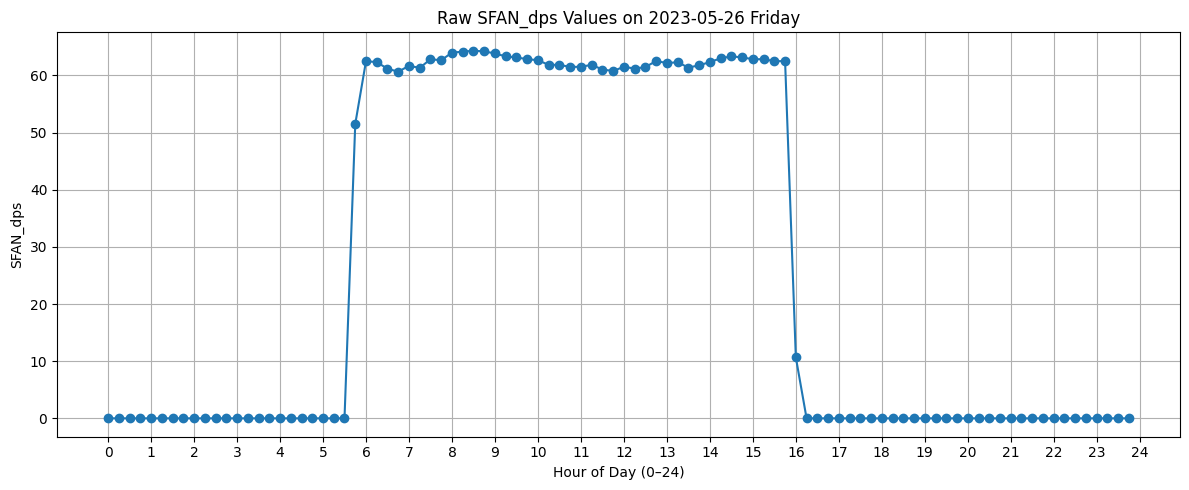

In [32]:
# Convert datetime column
df['datetime'] = pd.to_datetime(df['datetime'])


# Filter data for 2023-05-26
target_day = '2023-05-26'
start = pd.to_datetime(target_day)
end = start + pd.Timedelta(days=1)
day_df = df[(df['datetime'] >= start) & (df['datetime'] < end)].copy()

# Extract hour + minute in decimal format for smooth x-axis (e.g., 4.5 = 4:30)
day_df['hour_decimal'] = day_df['datetime'].dt.hour + day_df['datetime'].dt.minute / 60

# Plot
plt.figure(figsize=(12, 5))
plt.plot(day_df['hour_decimal'], day_df['SFAN_dps'], marker='o', linestyle='-')
plt.title('Raw SFAN_dps Values on 2023-05-26 Friday')
plt.xlabel('Hour of Day (0–24)')
plt.ylabel('SFAN_dps')
plt.xticks(range(0, 25))  # Show ticks from 0 to 24
plt.grid(True)
plt.tight_layout()
plt.show()



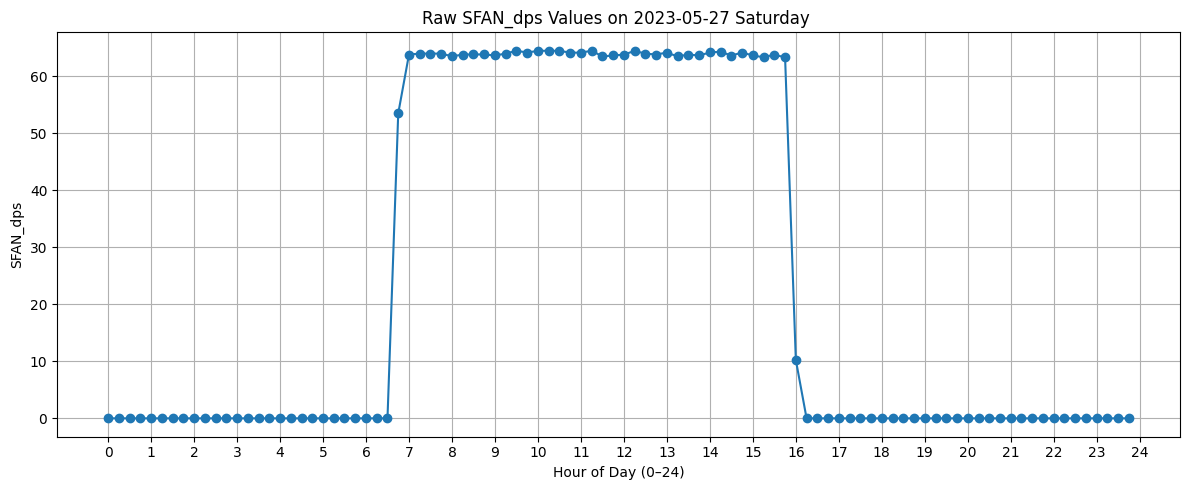

In [39]:
# Convert datetime column
df['datetime'] = pd.to_datetime(df['datetime'])


# Filter data for 2023-05-26
target_day = '2023-05-27'
start = pd.to_datetime(target_day)
end = start + pd.Timedelta(days=1)
day_df = df[(df['datetime'] >= start) & (df['datetime'] < end)].copy()

# Extract hour + minute in decimal format for smooth x-axis (e.g., 4.5 = 4:30)
day_df['hour_decimal'] = day_df['datetime'].dt.hour + day_df['datetime'].dt.minute / 60

# Plot
plt.figure(figsize=(12, 5))
plt.plot(day_df['hour_decimal'], day_df['SFAN_dps'], marker='o', linestyle='-')
plt.title('Raw SFAN_dps Values on 2023-05-27 Saturday ')
plt.xlabel('Hour of Day (0–24)')
plt.ylabel('SFAN_dps')
plt.xticks(range(0, 25))  # Show ticks from 0 to 24
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
avg_sfan_dps = df['SFAN_dps'].mean()
print(f"Average SFAN_dps: {avg_sfan_dps:.2f}")


Average SFAN_dps: 82.46


In [35]:
mode_sfan = df['SFAN_dps'].mode()
print("Mode(s) of SFAN_dps:", mode_sfan.values)


Mode(s) of SFAN_dps: [0.]


In [36]:
median_sfan = df['SFAN_dps'].median()
print(f"Median SFAN_dps: {median_sfan}")


Median SFAN_dps: 0.0


In [37]:
# Define the time window
start = pd.to_datetime('2023-05-26 12:00:00')
end = pd.to_datetime('2023-05-26 18:00:00')

# Filter the DataFrame
early_morning_df = df[(df['datetime'] >= start) & (df['datetime'] < end)]

# Display the result
print(early_morning_df[['datetime', 'SFAN_dps']])

               datetime   SFAN_dps
299 2023-05-26 12:00:00  61.519259
300 2023-05-26 12:15:00  61.197255
301 2023-05-26 12:30:00  61.463750
302 2023-05-26 12:45:00  62.526042
303 2023-05-26 13:00:00  62.164902
304 2023-05-26 13:15:00  62.312708
305 2023-05-26 13:30:00  61.373333
306 2023-05-26 13:45:00  61.773333
307 2023-05-26 14:00:00  62.333333
308 2023-05-26 14:15:00  63.000000
309 2023-05-26 14:30:00  63.333333
310 2023-05-26 14:45:00  63.161111
311 2023-05-26 15:00:00  62.838889
312 2023-05-26 15:15:00  62.838317
313 2023-05-26 15:30:00  62.494444
314 2023-05-26 15:45:00  62.505556
315 2023-05-26 16:00:00  10.677778
316 2023-05-26 16:15:00   0.000000
317 2023-05-26 16:30:00   0.000000
318 2023-05-26 16:45:00   0.000000
319 2023-05-26 17:00:00   0.000000
320 2023-05-26 17:15:00   0.000000
321 2023-05-26 17:30:00   0.000000
322 2023-05-26 17:45:00   0.000000


SFAN_dps Statistics:
count    64144.000000
mean        82.455294
std        119.101101
min          0.000000
25%          0.000000
50%          0.000000
75%        198.502444
max        453.370460
Name: SFAN_dps, dtype: float64


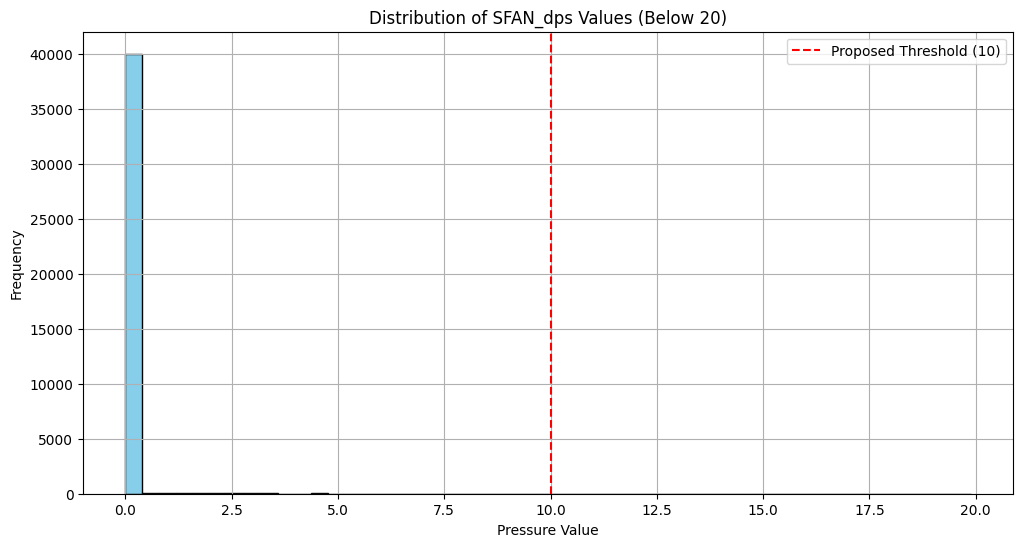


Threshold Analysis:
Percentage of time OFF: 63.12%
Average OFF value: 0.04
Maximum OFF value: 9.78

Percentage of time ON: 36.88%
Minimum ON value: 10.24
Average ON value: 223.50


In [38]:
# 1. Basic statistics
print("SFAN_dps Statistics:")
print(df['SFAN_dps'].describe())

# 2. Visualize distribution (focusing on values <20 for better resolution)
plt.figure(figsize=(12, 6))
plt.hist(df['SFAN_dps'][df['SFAN_dps'] < 20], bins=50, color='skyblue', edgecolor='black')
plt.axvline(x=10, color='red', linestyle='--', label='Proposed Threshold (10)')
plt.title('Distribution of SFAN_dps Values (Below 20)')
plt.xlabel('Pressure Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# 3. Threshold validation metrics
off_values = df[df['SFAN_dps'] <= 10]['SFAN_dps']
on_values = df[df['SFAN_dps'] > 10]['SFAN_dps']

print("\nThreshold Analysis:")
print(f"Percentage of time OFF: {len(off_values)/len(df):.2%}")
print(f"Average OFF value: {off_values.mean():.2f}")
print(f"Maximum OFF value: {off_values.max():.2f}")
print(f"\nPercentage of time ON: {len(on_values)/len(df):.2%}")
print(f"Minimum ON value: {on_values.min():.2f}")
print(f"Average ON value: {on_values.mean():.2f}")
